In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
from sklearn import datasets

In [17]:
def Kmeans(data,no_of_clusters):
    
    color = ['r','g','b','y','c','m','k','w']
    #initialising the centroids
    rand_data = data.copy()       #As we dont want to distort the data
    np.random.shuffle(rand_data)
    centroids = rand_data[:no_of_clusters]
    
    #first clustering after calculating the eucleadian distance from centroids to each points
    distances = np.sqrt(((data-centroids[:, np.newaxis])**2).sum(axis=2))
    clustered_data = np.argmin(distances, axis=0)
    print(clustered_data)
    
    while True:
        new_centroids = np.array([data[clustered_data==k].mean(axis=0) for k in range(centroids.shape[0])])
        distances = np.sqrt(((data - new_centroids[:, np.newaxis])**2).sum(axis=2))
        temp_clustered_data = np.argmin(distances, axis=0)
        if np.array_equal(temp_clustered_data,clustered_data):
            break;
        else:
            clustered_data = temp_clustered_data
    
    arr = np.unique(clustered_data)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clustered_data==x))
    p=0
    
    print(clustered_data)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()
        
            
    return clustered_data

In [18]:
iris = datasets.load_iris()
X = iris.data
feature_names = iris.feature_names
y = iris.target
target_names = iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


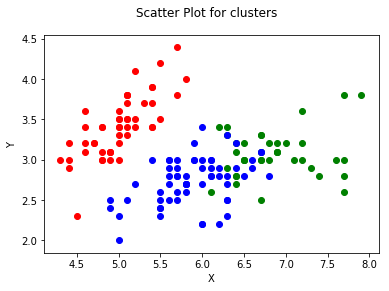

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [19]:
Kmeans(X,3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


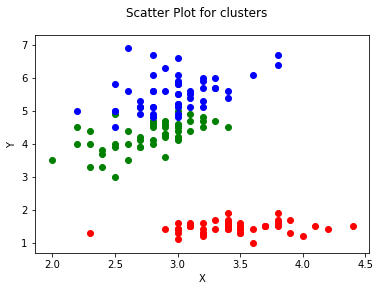

In [20]:
arr = np.unique(y)
color = ['r','g','b','y','c','m','k','w'] 
indices_to_plot = []
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
for x in np.nditer(arr):
    indices_to_plot.append(np.where(y==x))
p=0
    
print(y)
for i in range(0,len(indices_to_plot)):
    for j in np.nditer(indices_to_plot[i]):
        ax.scatter(X[j,1],X[j,2], c= color[p])
    p = p + 1
        
plt.show()

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data = X
no_of_clusters = 3
rand_data = data.copy()       #As we dont want to distort the data
np.random.shuffle(rand_data)
centroids = rand_data[:no_of_clusters]
    
#first clustering after calculating the eucleadian distance from centroids to each points

Trying to calculate the distance between data_points and centroids

In [7]:
data = data[0:10,:]

In [8]:
rand_data = data.copy()       #As we dont want to distort the data
np.random.shuffle(rand_data)
centroids = rand_data[:no_of_clusters]

In [9]:
centroids.shape

(3, 4)

In [10]:
data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [11]:
centroids

array([[ 5. ,  3.6,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 4.9,  3. ,  1.4,  0.2]])

In [12]:
centroids[:, np.newaxis]

array([[[ 5. ,  3.6,  1.4,  0.2]],

       [[ 4.9,  3.1,  1.5,  0.1]],

       [[ 4.9,  3. ,  1.4,  0.2]]])

In [13]:
((data-centroids[:, np.newaxis])**2)

array([[[ 0.01,  0.01,  0.  ,  0.  ],
        [ 0.01,  0.36,  0.  ,  0.  ],
        [ 0.09,  0.16,  0.01,  0.  ],
        [ 0.16,  0.25,  0.01,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.16,  0.09,  0.09,  0.04],
        [ 0.16,  0.04,  0.  ,  0.01],
        [ 0.  ,  0.04,  0.01,  0.  ],
        [ 0.36,  0.49,  0.  ,  0.  ],
        [ 0.01,  0.25,  0.01,  0.01]],

       [[ 0.04,  0.16,  0.01,  0.01],
        [ 0.  ,  0.01,  0.01,  0.01],
        [ 0.04,  0.01,  0.04,  0.01],
        [ 0.09,  0.  ,  0.  ,  0.01],
        [ 0.01,  0.25,  0.01,  0.01],
        [ 0.25,  0.64,  0.04,  0.09],
        [ 0.09,  0.09,  0.01,  0.04],
        [ 0.01,  0.09,  0.  ,  0.01],
        [ 0.25,  0.04,  0.01,  0.01],
        [ 0.  ,  0.  ,  0.  ,  0.  ]],

       [[ 0.04,  0.25,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.04,  0.04,  0.01,  0.  ],
        [ 0.09,  0.01,  0.01,  0.  ],
        [ 0.01,  0.36,  0.  ,  0.  ],
        [ 0.25,  0.81,  0.09,  0.04],
        

In [14]:
p= np.sqrt(((data-centroids[:, np.newaxis])**2).sum(axis=2))
p

array([[ 0.14142136,  0.60827625,  0.50990195,  0.64807407,  0.        ,
         0.6164414 ,  0.45825757,  0.2236068 ,  0.92195445,  0.52915026],
       [ 0.46904158,  0.17320508,  0.31622777,  0.31622777,  0.52915026,
         1.00995049,  0.47958315,  0.33166248,  0.55677644,  0.        ],
       [ 0.53851648,  0.        ,  0.3       ,  0.33166248,  0.60827625,
         1.09087121,  0.50990195,  0.42426407,  0.50990195,  0.17320508]])

In [16]:
clustered_data = np.argmin(p, axis=0)
clustered_data

array([0, 2, 2, 1, 0, 0, 0, 0, 2, 1])

In [227]:
new_centroids = np.array([data[clustered_data==k].mean(axis=0) for k in range(centroids.shape[0])])

In [228]:
new_centroids

array([[ 4.925,  3.475,  1.425,  0.225],
       [ 5.4  ,  3.9  ,  1.7  ,  0.4  ],
       [ 4.7  ,  3.06 ,  1.42 ,  0.18 ]])

In [229]:
distances = np.sqrt(((data - new_centroids[:, np.newaxis])**2).sum(axis=2))

In [230]:
distances

array([[ 0.18027756,  0.4769696 ,  0.37749172,  0.50249378,  0.15      ,
         0.71589105,  0.34278273,  0.13228757,  0.77942286,  0.40311289],
       [ 0.6164414 ,  1.09087121,  1.08627805,  1.16619038,  0.6164414 ,
         0.        ,  0.99498744,  0.7       ,  1.45945195,  1.00995049],
       [ 0.59531504,  0.21071308,  0.18547237,  0.1356466 ,  0.61838499,
         1.14995652,  0.37469988,  0.46086874,  0.34117444,  0.23323808]])

In [ ]:
def elbow_method(data):
    